In [53]:
#Animesh Srivastava 15MI445

#Requirements
#Scipy Version 1.1.0
#numpy Version 1.14.5
#matplotlib Version  2.2.2
#jupyter Version 1.0.0
#*Note that all the higher available versions can support the work

%matplotlib inline
import numpy as np
import scipy as sp
from scipy import stats
from scipy.optimize import fmin
import matplotlib.pyplot as plt
import random

[This cell is formatted to be a Markdown Cell] 

To understand how to use Markdown, refer here: https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet


# Gradient Descent

Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point.

Also refer to Appendix for detailed discussion.

![Gradient Descent](https://optimization.mccormick.northwestern.edu/images/4/4c/Line_search_alogorithm_chart.png)

As a simple example, let's find a local minimum for the function $f(x) = x^3-2x^2+1.5$

To understand gradient descent:
1. https://www.kdnuggets.com/2017/04/simple-understand-gradient-descent-algorithm.html
2. https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html
3. https://medium.com/deep-math-machine-learning-ai/chapter-1-2-gradient-descent-with-math-d4f2871af402

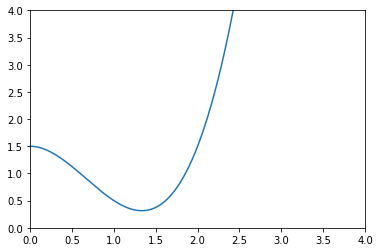

In [54]:
f = lambda x: x**3-2*x**2+1.5
x = np.linspace(-2,3,1000)
plt.plot(x,f(x))
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

From the graph it is visible that local minimum is near 1.4 or 1.5 (on the x-axis)
Something similar to the graph below, as we can easily see from the figure

![](https://miro.medium.com/max/1400/1*jNyE54fTVOH1203IwYeNEg.png)



But let's pretend that we don't know that, so we set our starting point (arbitrarily, in this case) at $x_0 = 1$

To understand python functions:
https://ehmatthes.github.io/pcc/cheatsheets/README.html

In [55]:
x_old = 0 # Let old value be 0
x_new = 1 # The algorithm starts at x=1
n_k = 0.1 # This is the step size
precision = 0.0001

x_list, y_list = [x_new], [f(x_new)]


def f_prime(x):
    return 3*x**2-4*x #derivative of f
 
while abs(x_new - x_old) > precision:
    x_old = x_new
    s_k = -f_prime(x_old)
    x_new = x_old + n_k * s_k
    x_list.append(x_new)
    y_list.append(f(x_new))
print "Local minimum at:", x_new
print "Number of steps:", len(x_list)

Local minimum at: 1.33324303007
Number of steps: 18


We can also reduce the number of Steps taken by starting from a higher starting point, say at $x_0 = 2$

In [56]:
x_old = 0
x_new = 2 # The algorithm starts at x=1
n_k = 0.1 # step size
precision = 0.0001

x_list, y_list = [x_new], [f(x_new)]


def f_prime(x):
    return 3*x**2-4*x #derivative of f
 
while abs(x_new - x_old) > precision:
    x_old = x_new
    s_k = -f_prime(x_old)
    x_new = x_old + n_k * s_k
    x_list.append(x_new)
    y_list.append(f(x_new))
print "Local minimum at:", x_new
print "Number of steps:", len(x_list)

Local minimum at: 1.33342535085
Number of steps: 17


The figures below show the route that was taken to find the local minimum.
Step Size is taken constant above.
If the step size is too small, then convergence will be very slow, but if we make it too large, then the method may fail to converge at all. 

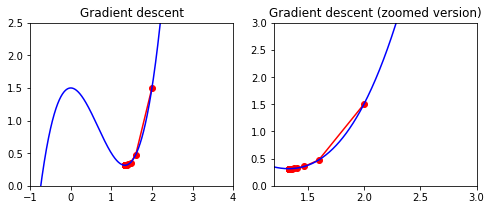

In [57]:
plt.figure(figsize=[8,3])
plt.subplot(1,2,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-1,4])
plt.ylim([0,2.5])
plt.title("Gradient descent")
plt.subplot(1,2,2)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.2,3])
plt.ylim([0,3])
plt.title("Gradient descent (zoomed version)")
plt.show()

A solution to this is to use adaptive step sizes as the algorithm below does (using scipy's fmin function to find optimal step sizes):

In [58]:
def f2(n,x,s):
    x = x + n*s
    return f(x)
# We are using x_new to be 1, you can use any higher value in range
x_old = 0
x_new = 1 # The algorithm starts at x=2
precision = 0.0001

x_list, y_list = [x_new], [f(x_new)]

# value of the derivative of our function
def f_prime(x):
    return 3*x**2-4*x

while abs(x_new - x_old) > precision:
    x_old = x_new
    s_k = -f_prime(x_old)
    
    # use scipy fmin function
    n_k = fmin(f2,0.1,(x_old,s_k), full_output = False, disp = False)

    x_new = x_old + n_k * s_k
    x_list.append(x_new)
    y_list.append(f(x_new))
    
print "Local minimum occurs at ", float(x_new)
print "Number of steps:", len(x_list)

Local minimum occurs at  1.33333333282
Number of steps: 3


We can implement it with x_new = 2 also,

In [60]:
def f2(n,x,s):
    x = x + n*s
    return f(x)
# We are using x_new to be 2, you can use any higher value in range
x_old = 0
x_new = 2 # The algorithm starts at x=2
precision = 0.0001

x_list, y_list = [x_new], [f(x_new)]

# value of the derivative of our function
def f_prime(x):
    return 3*x**2-4*x

while abs(x_new - x_old) > precision:
    x_old = x_new
    s_k = -f_prime(x_old)
    
    # use scipy fmin function 
    n_k = fmin(f2,0.1,(x_old,s_k), full_output = False, disp = False)

    x_new = x_old + n_k * s_k
    x_list.append(x_new)
    y_list.append(f(x_new))
    
print "Local minimum occurs at ", float(x_new)
print "Number of steps:", len(x_list)

Local minimum occurs at  1.33333332845
Number of steps: 4


For x_new = 2, With adaptive step sizes, the algorithm converges in just 4 iterations rather than 17. 
We can show this with help of plots. We can see that it converges quickly to a point near the local minimum, so it's hard to even discern the dots after the first two steps until we zoom in very close in the third frame below:

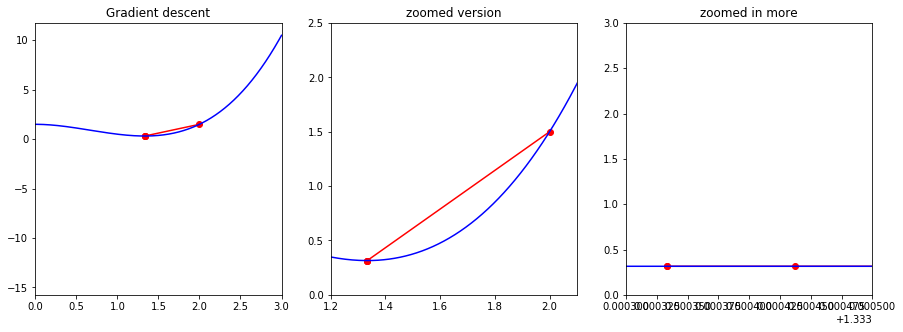

In [61]:
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([0,3])
plt.title("Gradient descent")
plt.subplot(1,3,2)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.2,2.1])
plt.ylim([0,2.5])
plt.title("zoomed version")
plt.subplot(1,3,3)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.3333,1.3335])
plt.ylim([0,3])
plt.title("zoomed in more")
plt.show()

Another approach to update the step size is choosing a decrease constant $d$ that shrinks the step size over time:
$\eta(t+1) = \eta(t) / (1+t \times d)$.

In [62]:
x_old = 0
x_new = 2 # The algorithm starts at x=2
n_k = 0.17 # step size
precision = 0.0001
t, d = 0, 1

x_list, y_list = [x_new], [f(x_new)]

#derivative of our function
def f_prime(x):
    return 3*x**2-4*x
 
while abs(x_new - x_old) > precision:
    x_old = x_new
    s_k = -f_prime(x_old)
    x_new = x_old + n_k * s_k
    x_list.append(x_new)
    y_list.append(f(x_new))
    n_k = n_k / (1 + t * d)
    t += 1

print "Local minimum occurs at:", x_new
print "Number of steps:", len(x_list)

Local minimum occurs at: 1.33085067409
Number of steps: 6


The graph is plotted after the code

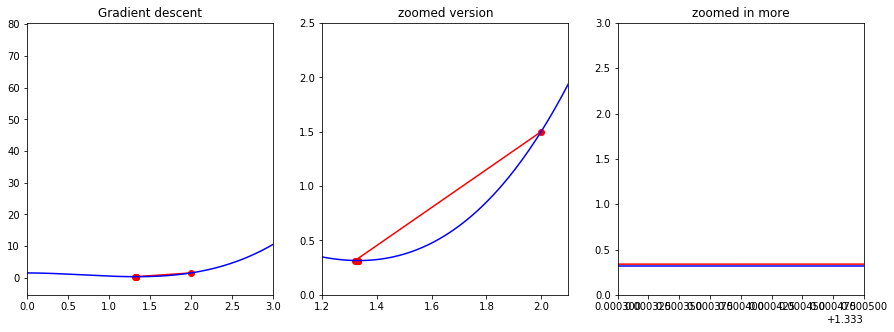

In [44]:
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([0,3])
plt.title("Gradient descent")
plt.subplot(1,3,2)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.2,2.1])
plt.ylim([0,2.5])
plt.title("zoomed version")
plt.subplot(1,3,3)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.3333,1.3335])
plt.ylim([0,3])
plt.title("zoomed in more")
plt.show()

Appendix:
Gradient Descent and it's variant

Let’s first see how gradient descent works on logistic regression before going into the details of its variants. For the sake of simplicity, let’s assume that the logistic regression model has only two parameters: weight w and bias b.

1. Initialize weight w and bias b to any random numbers.

2. Pick a value for the learning rate α. The learning rate determines how big the step would be on each iteration.

    If α is very small, it would take long time to converge and become computationally expensive.
    If α is large, it may fail to converge and overshoot the minimum.

Therefore, plot the cost function against different values of α and pick the value of α that is right before the first value that didn’t converge so that we would have a very fast learning algorithm that converges, see figure

![](https://miro.medium.com/max/1400/1*rcmvCjQvsxrJi8Y4HpGcCw.png)
   The most commonly used rates are : 0.001, 0.003, 0.01, 0.03, 0.1, 0.3.

3. Make sure to scale the data if it’s on a very different scales. If we don’t scale the data, the level curves (contours) would be narrower and taller which means it would take longer time to converge, see figure.

![](https://miro.medium.com/max/700/1*vXpodxSx-nslMSpOELhovg.png)

Scale the data to have μ = 0 and σ = 1. Below is the formula for scaling each example:

![](https://miro.medium.com/max/573/1*2g6dhidPigWEuAFyNHL8iw.png)

4. On each iteration, take the partial derivative of the cost function J(w) w.r.t each parameter (gradient):

![](https://miro.medium.com/max/634/1*WmuFVQbceFdNKO2Usl_O7A.png)

The update equations are:

![](https://miro.medium.com/max/700/1*VDTl0P6ongCcM0AgDPUR_g.png)

For the sake of illustration, let’s assume we don’t have bias. If the slope of the current value of w > 0, this means that we are to the right of optimal w*. Therefore, the update will be negative, and will start getting close to the optimal values of w*. However, if it’s negative, the update will be positive and will increase the current values of w to converge to the optimal values of w*(see figure):

![](https://miro.medium.com/max/700/1*jNyE54fTVOH1203IwYeNEg.png)

    Continue the process until the cost function converges. That is, until the error curve becomes flat and doesn’t change.
    In addition, on each iteration, the step would be in the direction that gives the maximum change since it’s perpendicular to level curves at each step.